In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style



In [2]:
def read_dataset(path, name):
    df = pd.read_csv(path + name, header=None)
    return df

In [3]:
def initialize_membership_matrix(df, k):
    membership_matrix = np.random.dirichlet(np.ones(k),size=len(df))
    df_membership_matrix = pd.DataFrame(membership_matrix)
    return df_membership_matrix

In [4]:
def find_centroids(df, k, membership_matrix, m):
    centroids = np.zeros((k, len(df.columns)))

    for i in range(k):
        sum_membership = sum(np.power(membership_matrix[i], m))
        for j in range (len(df.columns)):
            c = sum(np.multiply(np.power(membership_matrix[i], m), df[j]))/sum_membership
            centroids[i, j] = c

    return centroids    

In [5]:
def calculate_membership_matrix(df, centroids, m):
    EuclidianDistance = pd.DataFrame()
    inverse_EuclidianDistance = pd.DataFrame()
    membership_matrix = pd.DataFrame()
    for i in range(0, len(centroids)):
        x = 0
        for j in range(0, len(df.columns)):
            x = np.add(x, np.power((df.iloc[ : , j] - centroids[i,j]), 2))
        x = np.sqrt(x)
        EuclidianDistance[len(EuclidianDistance.columns)] = x

    inverse_EuclidianDistance = np.power((1 / EuclidianDistance), 1/(m-1))
    sum = inverse_EuclidianDistance.sum(axis=1)

    for i in range(len(centroids)):
        membership_matrix[len(membership_matrix.columns)] = np.power(1 / EuclidianDistance[i], 1/(m-1)) / sum

    return membership_matrix   

In [6]:
def c_means(df, k, m, max_it):
    #initialing weights randomly
    membership_matrix = initialize_membership_matrix(df, k)
    centroids = np.zeros((k, len(df.columns)))
    for i in range(max_it):
        temp_centroids = find_centroids(df, k, membership_matrix, m)
        # print(np.array_equal(centroids, temp_centroids))
        if np.array_equal(centroids, temp_centroids):
            # print("clustering finished, it", i)
            minvalue_series = membership_matrix.idxmin(axis = 1)
            return centroids, membership_matrix, minvalue_series
        centroids = temp_centroids
        membership_matrix = calculate_membership_matrix(df, centroids, m)

    minvalue_series = membership_matrix.idxmax(axis = 1)
    return centroids, membership_matrix, minvalue_series

In [7]:
#Calculate cost
def cost_calculate(df, centroids, membership_matrix, m):
    EuclidianDistance = pd.DataFrame()
    cost = 0
    
    for i in range(0, len(centroids)):
        x = 0
        for j in range(0, len(df.columns)):
            x = np.add(x, np.power((df.iloc[ : , j] - centroids[i,j]), 2))
        x = np.sqrt(x)
        EuclidianDistance[len(EuclidianDistance.columns)] = x
    # print(EuclidianDistance)
    # print(membership_matrix)
    cost = ((np.multiply(EuclidianDistance, np.power(membership_matrix, m)).sum(axis=1)).sum())/len(df)
    # print(cost)
    return cost



In [8]:
def plot_cost(df, k, m):
    axis = []
    k_list = []
    for i in range(1,k + 1):

        centroids, membership_matrix, minvalue_seri = c_means(df, i, m, 100)
        cost = cost_calculate(df, centroids, membership_matrix, m)      

        axis.append(cost)
        k_list.append(i)
    
    #plot
    font1 = {'family':'serif','color':'black','size':10}

    plt.xlabel("K", fontdict = font1)
    plt.ylabel("Cost", fontdict = font1)
    plt.title('Cost function per number of clusters, ' + 'K = '+str(k), fontdict = font1)
    plt.plot(k_list, axis, label = "Cost Function")
    plt.show()

In [9]:
our_datasets = []
our_datasets.append(read_dataset("datasets/", "data1.csv")) 
our_datasets.append(read_dataset("datasets/", "data2.csv"))
our_datasets.append(read_dataset("datasets/", "data3.csv"))
our_datasets.append(read_dataset("datasets/", "data4.csv"))

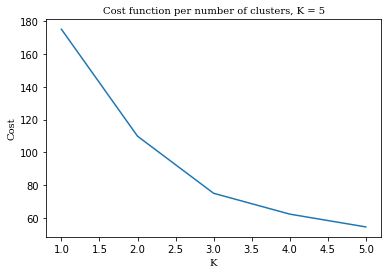

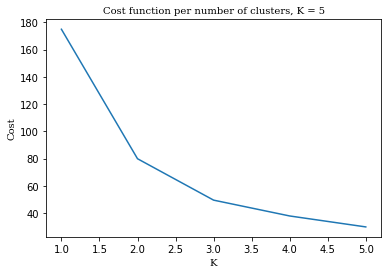

In [10]:
k = 5
m = 1.25
plot_cost(our_datasets[0], k, m)

k = 5
m = 2
plot_cost(our_datasets[0], k, m)

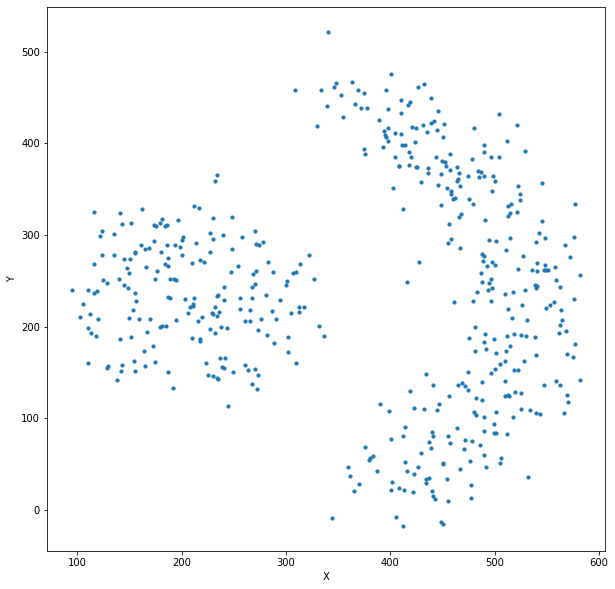

In [13]:
df = our_datasets[0]
k = 3
max_it = 100
m = 1.25

centroids, membership_matrix, minvalue_seri = c_means(df, k, m, max_it)
df_clustered = df.copy()       
df_clustered.loc[:, "Cluster"] = minvalue_seri

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x = df[0], y = df[1], s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

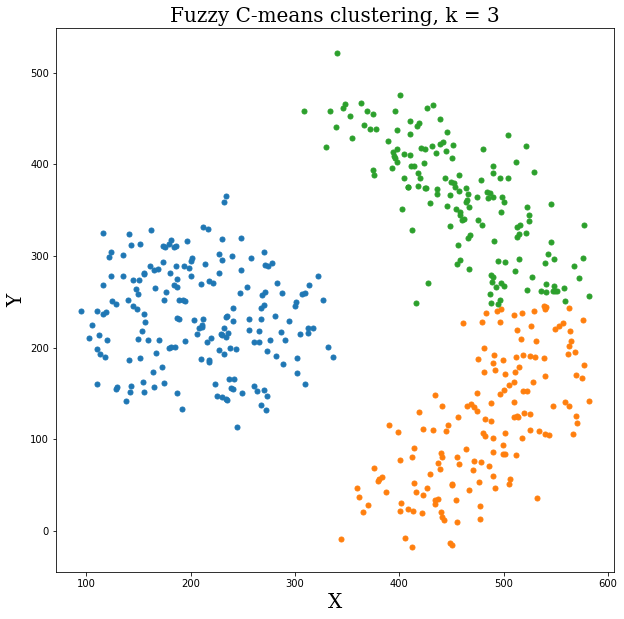

In [14]:
groups = df_clustered.groupby("Cluster")
fig, ax = plt.subplots(figsize=(10, 10))

font1 = {'family':'serif','color':'black','size':20}

plt.xlabel("X", fontdict = font1)
plt.ylabel("Y", fontdict = font1)

for name, group in groups:
     plt.plot(group[0], group[1], marker=".", markersize=10, linestyle="", label="Cluster")

plt.title('Fuzzy C-means clustering, ' + 'k = '+str(k), fontdict = font1)



plt.show()


In [18]:
mainDf = pd.DataFrame()
mainDf[0] = [0.0, 1.3 , 2 , 3]
mainDf
x = 0.0
y = 1/mainDf
y.replace([np.inf, -np.inf], 1, inplace=True)
try:
     y = 1/mainDf
except ZeroDivisionError:
     print("hello")

print(y)


          0
0       inf
1  0.769231
2  0.500000
3  0.333333
